In [1]:
from optionprice import Option
import matplotlib.pyplot as plt

In [2]:
VOLATILITIY = 0.28
RATE = 0.05
STRIKE = 150

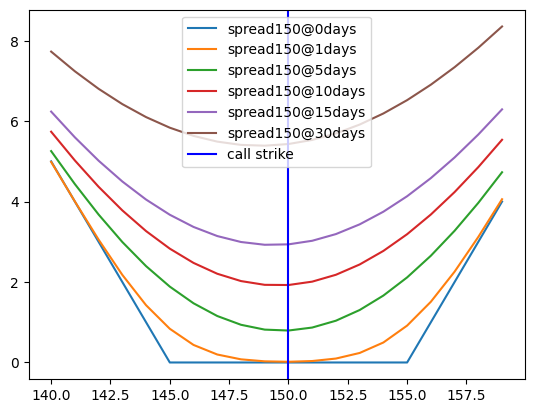

In [3]:
def p_opt(kind, s0, k, t):
    if t == 0:
        return (max(s0 - k, 0)
                if kind == 'call'
                else max(k - s0, 0))
    return Option(
            european=True,
            kind=kind,
            s0=s0,
            k=k,
            sigma=VOLATILITIY,
            r=RATE,
            t=t
    ).getPrice()

def price_range(kind, strike, t, spread=0, zoom=10):
    x, y = [], []
    for underlying in range(strike - zoom,
                            strike + zoom):
        x.append(underlying)
        if kind == 'stradle':
            price = (p_opt('call', underlying, strike, t) + 
                     p_opt('put', underlying, strike, t))
        elif kind == 'spread':
            price = (p_opt('call', underlying, strike + (spread / 2), t) + 
                     p_opt('put', underlying, strike - (spread / 2), t))
        else:
            price = p_opt(kind, underlying, strike, t)
        y.append(price)
    return x, y



for days_to_expiry in [0, 1, 5, 10, 15, 30]:
    x, y = price_range('spread', STRIKE, days_to_expiry, spread=10)
    plt.plot(x, y, label=f'spread{STRIKE}@{days_to_expiry}days')

plt.axvline(x=STRIKE, color='b', label='call strike')
plt.legend();